In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X,Y = make_circles(n_samples=500,noise=0.02)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


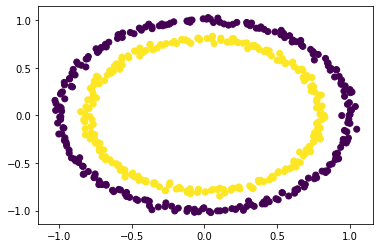

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [6]:
X_ = phi(X)

(500, 3)


In [7]:
X_.shape

(500, 3)

In [8]:
print(X_[:3,:])

[[ 0.53222419 -0.81162136  0.94199183]
 [ 0.68530028 -0.75246337  1.0358376 ]
 [-0.11087935  0.77651709  0.61527303]]


In [9]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax
    

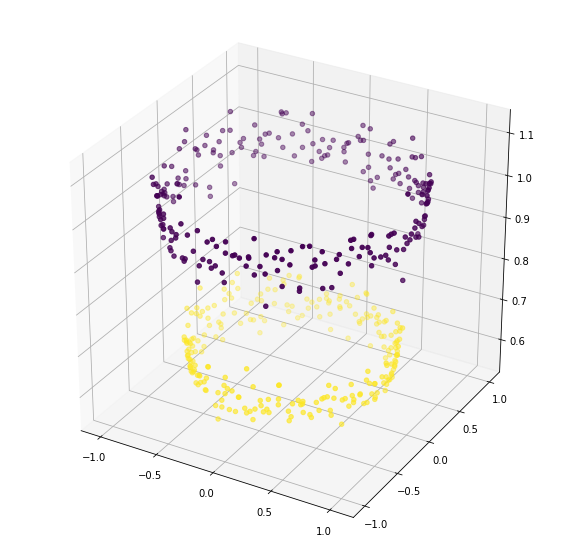

In [10]:
ax = plot3d(X_)

### Logistic Classifier

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
lr = LogisticRegression()

In [13]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 47.0000


### Logistic Classifier on Higher Dimension Space

In [14]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


### Visualise the Decision Surface

In [15]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
wts = lr.coef_
print(wts)

[[ 1.64776750e-03  1.70613101e-03 -1.08901324e+01]]


In [17]:
bias = lr.intercept_

In [18]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [19]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)


[[0.82030408 0.82045539 0.82060669 0.820758  ]
 [0.82046075 0.82061205 0.82076336 0.82091467]
 [0.82061741 0.82076872 0.82092003 0.82107134]
 [0.82077408 0.82092539 0.8210767  0.82122801]]


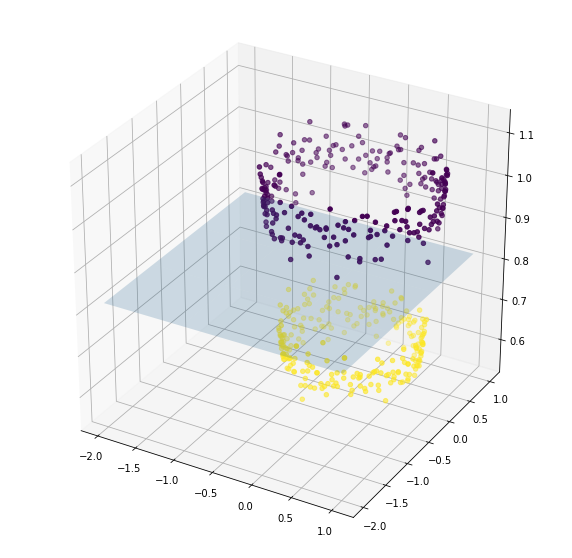

In [20]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

## Kernel Based Classifcation in SVM's
Sklearn supports the following types of Kernels, which can be used in many-real life problems.

- Linear Kernel
- RBF Kernel
- Polynomial Kernel
- Sigmoid Kernel

**Kernel trick** is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

https://towardsdatascience.com/kernel-function-6f1d2be6091

In [21]:
from sklearn import svm

### Linear Kernel SVM

In [22]:
svc = svm.SVC(kernel="linear")

In [23]:
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
svc.score(X,Y)

0.502

### RBF Kernel SVM

In [25]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

## Polynomial 

In [26]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

0.552

### Custom Kernel

In [27]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

## Mathematical Formulation
https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation

https://scikit-learn.org/stable/modules/svm.html
